# Solving the customer churn problem using Artificial Neural Networks

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

## Data PreProcessing

In [3]:
dataset = pd.read_csv("drive/MyDrive/ANN/Churn_Modelling.csv")
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:,-1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

In [6]:
# Encoding gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[: ,2] = le.fit_transform(X[:, 2])

In [7]:
#One hot encoding geography column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test) 

## Building our Artificial Neural Network

### Initializing the ANN

In [11]:
ann = tf.keras.models.Sequential()

### Adding input layer and first hidden layer of Neural Network

In [12]:
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

## Training the ANN

### Compiling the ANN

In [19]:
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Training the ANN on our training set

In [20]:
ann.fit(X_train, y_train, batch_size= 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 5s 4ms/step - loss: 0.6857 - accuracy: 0.6164
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4998 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.8052
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8164
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.8201
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8224
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8221
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4067 - accuracy: 0.8245
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4035 - accuracy: 0.8250
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4003 - accura

## Making predictions and evaluating model

### Predicting test result

In [21]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Evaluation parameters
* Confusion Matrix
* Accuracy Score

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1524   71]
 [ 200  205]]
0.8645


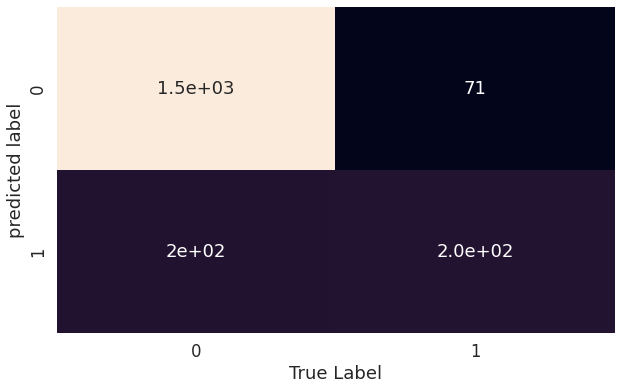

In [32]:
sns.set(font_scale = 1.5)
def plot_confusion_matrix(y_test, y_pred):
  fig, ax = plt.subplots(figsize = (10,6))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False)
  plt.xlabel("True Label")
  plt.ylabel("predicted label")

plot_confusion_matrix(y_test, y_pred)

***